# Examine Results

In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom_test, chi2_contingency

from convnwb.paths import Paths

from spiketools.plts.data import plot_hist, plot_bar
from spiketools.plts.utils import make_axes, save_figure
from spiketools.plts.annotate import add_hlines

In [2]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [3]:
# Set pandas display options
pd.options.display.max_columns = None

## Settings

In [4]:
# Set data path to load from
results_path = Path('../results/units/all/')

In [5]:
# Set which experiment version to run
stimulus_version = 'face'   # 'face', 'object'

In [6]:
# Get the filename for the combined results file
results_fname = 'all_results-' + stimulus_version + '.csv'

In [7]:
# Define a list of analyses
th_analyses = ['chest', 'place', 'target', 'serial'] 
nb_analyses = ['baseline', 'id']
analyses = th_analyses + nb_analyses

In [20]:
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'    # 'two-sided', 'greater', 'less'

## Load Results

In [9]:
# Load results
all_results = pd.read_csv(results_path / results_fname)

In [10]:
# Check the head of the results
all_results.head()

,uid,session_id,subject_id,wvID,keep,n_spikes,firing_rate,presence_ratio,cluster,channel,location,fr_t_val_all,fr_p_val_all,fr_t_val_empt,fr_p_val_empt,fr_t_val_full,fr_p_val_full,place_anova,target_anova,serial_anova,place_anova_surr_p_val,place_anova_surr_z_score,target_anova_surr_p_val,target_anova_surr_z_score,serial_anova_surr_p_val,serial_anova_surr_z_score,is_chest,is_place,is_target,is_serial,region,side,id_fvalue,baseline_tvalue,is_id,is_baseline,id_type,baseline_tvalue_abs,fr_t_val_full_abs,keep_th
0,0,THF_wv001_session_0,wv001,1,True,630,0.511243,0.651822,2229,A10,LAH,0.838964,0.405121,-1.156732,0.261719,1.310645,0.198513,0.296563,1.591088,0.966072,0.989,-0.706820,0.145,0.926736,0.367,0.140749,False,False,False,False,AH,left,1.076359,0.922175,False,False,NaN,0.922175,1.310645,True
1,1,THF_wv001_session_0,wv001,2,True,454,0.368420,0.676113,2360,A10,LAH,0.747516,0.457936,-1.071432,0.297397,2.223143,0.032760,1.295190,0.931677,1.034851,0.335,-0.059906,0.484,-0.198605,0.347,0.164065,True,False,False,False,AH,left,1.168815,1.011120,False,False,NaN,1.011120,2.223143,True
2,2,THF_wv001_session_0,wv001,3,True,580,0.469046,0.797571,2421,A10,LAH,0.659236,0.512495,0.281954,0.781027,0.680864,0.500437,0.615918,0.810753,1.183255,0.775,-0.527601,0.510,-0.243767,0.203,0.666446,False,False,False,False,AH,left,1.241980,-0.115789,False,False,NaN,0.115789,0.680864,True
3,3,THF_wv001_session_0,wv001,4,True,2164,1.748777,1.000000,2556,A10,LAH,-0.051453,0.959151,1.046558,0.308436,-0.739510,0.464529,0.675223,2.017667,1.482066,0.743,-0.610637,0.060,1.581672,0.133,0.883660,False,False,False,False,AH,left,0.956436,-2.624513,False,True,NaN,2.624513,0.739510,True
4,4,THF_wv001_session_0,wv001,5,True,342,0.265360,0.526316,774,A15,LAH,-0.850696,0.398627,-0.842344,0.410074,-0.320374,0.750590,6.803619,0.974146,0.667268,0.014,1.232447,0.372,-0.016482,0.442,-0.160701,False,True,False,False,AH,left,1.086618,1.893768,False,False,NaN,1.893768,0.320374,True


In [11]:
# Check the columns in the loaded file
all_results.columns

Index(['uid', 'session_id', 'subject_id', 'wvID', 'keep', 'n_spikes',
       'firing_rate', 'presence_ratio', 'cluster', 'channel', 'location',
       'fr_t_val_all', 'fr_p_val_all', 'fr_t_val_empt', 'fr_p_val_empt',
       'fr_t_val_full', 'fr_p_val_full', 'place_anova', 'target_anova',
       'serial_anova', 'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'target_anova_surr_p_val', 'target_anova_surr_z_score',
       'serial_anova_surr_p_val', 'serial_anova_surr_z_score', 'is_chest',
       'is_place', 'is_target', 'is_serial', 'region', 'side', 'id_fvalue',
       'baseline_tvalue', 'is_id', 'is_baseline', 'id_type',
       'baseline_tvalue_abs', 'fr_t_val_full_abs', 'keep_th'],
      dtype='object')

### Location Checks

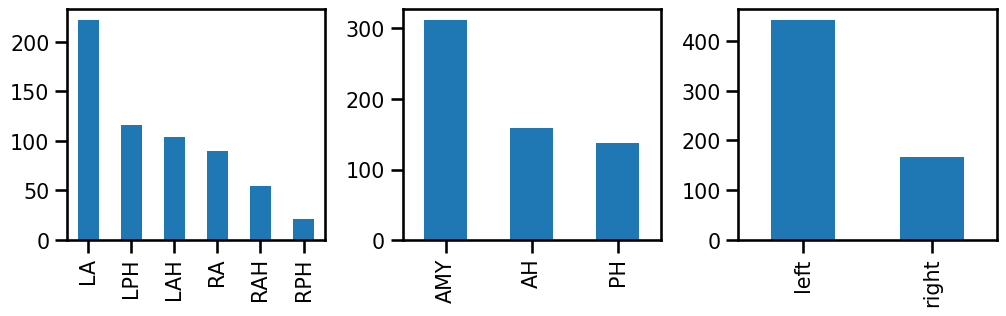

In [12]:
# Plot the unit counts per location
axes = make_axes(3, 3, figsize=(12, 3), wspace=0.3)
all_results['location'].value_counts().plot(kind='bar', ax=axes[0]);
all_results['region'].value_counts().plot(kind='bar', ax=axes[1]);
all_results['side'].value_counts().plot(kind='bar', ax=axes[2]);

In [13]:
# # Check location counts
# all_results['location'].value_counts()

In [14]:
# # Check area counts
# all_results['region'].value_counts()

In [15]:
# # Check area counts
# all_results['side'].value_counts()

## Check Results

In [16]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))

Total number of cells: 608


In [17]:
# Collect numbers of significant cells
results = {}
for analysis in analyses:
    results[analysis] = sum(all_results['is_' + analysis])

In [21]:
# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

In [22]:
# Check the number & percent of significant cells per analysis
print('{} - total cells: {}\n'.format(stimulus_version, n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

face - total cells: 608

# chest cells:     		108  (17.76%) 		 0.0000
# place cells:     		 28  ( 4.61%) 		 0.6983
# target cells:     		 43  ( 7.07%) 		 0.0155
# serial cells:     		 98  (16.12%) 		 0.0000
# baseline cells:     		102  (16.78%) 		 0.0000
# id cells:     		 51  ( 8.39%) 		 0.0003


#### Drop non-significant analyses

In [23]:
# # ...
# remove = ['place']
# for el in remove:
#     if el in th_analyses:
#         th_analyses.remove(el)

## Check Results by Subject / Session

In [24]:
# Check the number of detected cells per subject
pd.pivot_table(all_results, ['is_' + el for el in analyses], index='subject_id', aggfunc=np.sum)

,is_baseline,is_chest,is_id,is_place,is_serial,is_target
subject_id,,,,,,
wv001,51,47,25,13,34,20
wv002,15,16,6,7,20,7
wv003,0,5,0,1,1,0
wv004,29,40,19,6,40,14
wv005,7,0,1,1,3,2


In [25]:
# Check the number of detected cells per session
pd.pivot_table(all_results, ['is_' + el for el in analyses], index=['subject_id', 'session_id'], aggfunc=np.sum)

is_baseline  is_chest  is_id  is_place  \
subject_id session_id                                                    
wv001      THF_wv001_session_0           15        15     10         7   
           THF_wv001_session_2           17        12      5         1   
           THF_wv001_session_3           11        12      9         2   
           THF_wv001_session_4            8         8      1         3   
wv002      THF_wv002_session_0            9        13      3         6   
           THF_wv002_session_1            6         3      3         1   
wv003      THF_wv003_session_0            0         5      0         1   
wv004      THF_wv004_session_0           17        26     11         4   
           THF_wv004_session_1           12        14      8         2   
wv005      THF_wv005_session_0            7         0      1         1   

                                is_serial  is_target  
subject_id session_id                                 
wv001      THF_wv001_session_0          5         11  
           THF_wv001_session_2          8          2  
           THF_wv001_session_3          8          5  
           THF_wv001_session_4         13          2  
wv002      THF_wv002_session_0         13          3  
           THF_wv002_session_1          7          4  
wv003      THF_wv003_session_0          1          0  
wv004      THF_wv004_session_0         16          5  
           THF_wv004_session_1         24          9  
wv005      THF_wv005_session_0          3          2

## Results by Area

Analyze the results split up by area

Anatomical organization:
- 'region': a brain region, collapsing across left & right
- 'location': a specific location, split up by left & right

In [26]:
# Collect different area organizations together
places = {'region' : set(all_results['region']),
          'location' : set(all_results['location'])}

In [27]:
# Define which area organization to use
place = 'region'

In [28]:
#
region_results = {}
for analysis in analyses:

    region_results[analysis] = {}
    
    region_results[analysis]['all'] = {}
    region_results[analysis]['all']['count'] = results[analysis] 
    region_results[analysis]['all']['percent'] = results[analysis] / n_units

    for cplace in places[place]:
        temp = all_results[all_results[place] == cplace]
        
        region_results[analysis][cplace] = {}
        region_results[analysis][cplace]['count'] = sum(temp['is_' + analysis])
        region_results[analysis][cplace]['percent'] = sum(temp['is_' + analysis]) / len(temp)

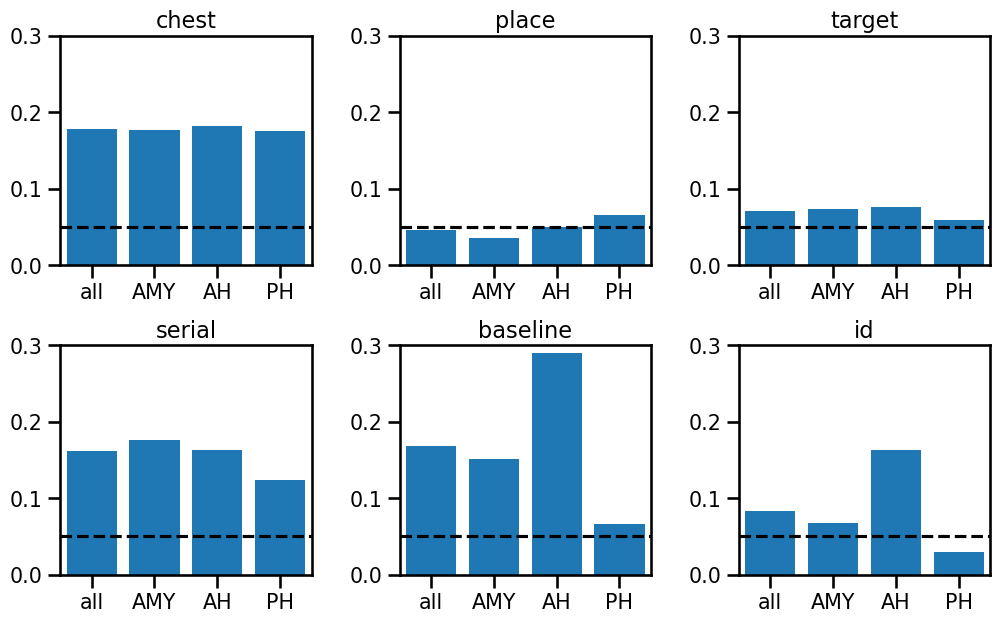

In [29]:
axes = make_axes(len(analyses), 3, hspace=0.35, wspace=0.35, figsize=(12, 7))
for analysis, ax in zip(analyses, axes):
    labels = list(region_results[analysis].keys())
    values = [region_results[analysis][label]['percent'] for label in labels]
    plot_bar(values, labels, title=analysis, ylim=[0, 0.30], ax=ax)
    add_hlines(0.05, linestyle='--', color='black', ax=ax)

In [30]:
region_counts = all_results['region'].value_counts().to_dict()
region_counts['all'] = n_units

In [32]:
for canalysis, cregion_dict in region_results.items():
    for cregion, cdict in cregion_dict.items():
        region_results[canalysis][cregion]['p_value'] = \
            binom_test(cdict['count'], region_counts[cregion], alpha_level, binom_sidedness)

In [33]:
# Check full set of results
#region_results

## Within Task Overlap

Check overlap of having multiple labels within each task.

### Treasure Hunt

Compute the overlap of labels within TH task

In [34]:
# Compute overlap between labels within TH task
over = np.zeros([len(th_analyses), len(th_analyses)])
for i1, acol1 in enumerate(th_analyses):
    a1res = set(all_results[all_results['is_' + acol1]].wvID.values)
    
    for i2, acol2 in enumerate(th_analyses):
        a2res = set(all_results[all_results['is_' + acol2]].wvID.values)
        
        over[i1, i2] = len(a1res.intersection(a2res)) / len(a1res)

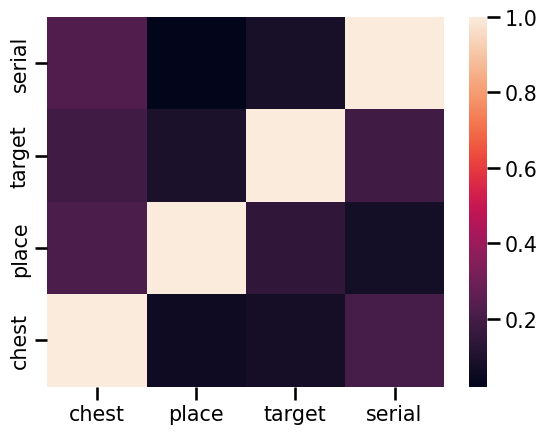

In [35]:
# Plot the overlap between TH labels
ax = sns.heatmap(over, xticklabels=th_analyses, yticklabels=th_analyses)
ax.invert_yaxis()

### nBack

In [36]:
# Check overlap of baseline and ID within nback
a1_nb = set(all_results[all_results['is_baseline']].wvID.values)
a2_nb = set(all_results[all_results['is_id']].wvID.values)
nb_over = len(a1_nb.intersection(a2_nb)) / len(a1_nb)
print('1B overlap: {:1.4f}%'.format(nb_over))

1B overlap: 0.1765%


# Compute Between Task Overlap

In [37]:
for nb_analysis in nb_analyses:
    
    print('\n', stimulus_version, ' - ', nb_analysis, '\n')
    print('\t {} \t {} \t {} \t {} \t\t {} \t\t{}'.format('#NB', '#TH', '#Over', '%Over', 'pval', 'exp'))
    
    nb_data = all_results[all_results['is_' + nb_analysis]].wvID.values

    for analysis in th_analyses:

        th_data = all_results[all_results['is_' + analysis]].wvID.values
        n_th = len(th_data)
        n_nb = len(nb_data)

        inter = len(set(th_data).intersection(set(nb_data)))

        arr = np.array([[inter, n_th-inter],
                        [n_nb-inter, n_units-n_th-n_nb+inter]])
        tstat, pval, dof, exp = chi2_contingency(arr, False)

        print('{} \t {} \t {} \t {} \t {:5.2f}% \t {:5.4f} \t {:2d}'.format(\
            analysis, n_nb, n_th, inter, (inter / n_nb) * 100, pval, round(exp[0][0])))


 face  -  baseline 

	 #NB 	 #TH 	 #Over 	 %Over 		 pval 		exp
chest 	 102 	 108 	 31 	 30.39% 	 0.0003 	 18
place 	 102 	 28 	 4 	  3.92% 	 0.7180 	  5
target 	 102 	 43 	 7 	  6.86% 	 0.9279 	  7
serial 	 102 	 98 	 18 	 17.65% 	 0.6453 	 16

 face  -  id 

	 #NB 	 #TH 	 #Over 	 %Over 		 pval 		exp
chest 	 51 	 108 	 14 	 27.45% 	 0.0586 	  9
place 	 51 	 28 	 3 	  5.88% 	 0.6494 	  2
target 	 51 	 43 	 2 	  3.92% 	 0.3591 	  4
serial 	 51 	 98 	 9 	 17.65% 	 0.7564 	  8
